In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

In [38]:
data = pd.read_csv('train.csv')
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
test = pd.read_csv('test.csv')
test

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650,1
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410,0
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919,1
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558,1
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1993-03-19,40,300000,850,12696,60,Married,1,Other,...,3,Self-Employed,Master,19,10957,0.102696,0.094445,266.295150,0.028012,1
4996,4996,2015-09-27,39,75014,572,49380,48,Married,0,Mortgage,...,3,Employed,Master,16,7587,0.268380,0.302377,1784.809960,0.301033,0
4997,4997,1993-10-04,43,15000,454,32810,72,Divorced,1,Other,...,6,Employed,Bachelor,17,403922,0.330810,0.283165,951.731011,0.992585,0
4998,4998,1981-05-10,53,98467,850,28446,96,Single,1,Own,...,6,Self-Employed,High School,30,5652,0.148446,0.163516,532.966868,0.090910,0


In [40]:
data = data[(abs(data['RiskScore']) <= 100) & (~pd.isna(data['RiskScore']))] #get rid of NaN's and invalid values in RiskScore

risk = data['RiskScore'].to_numpy()
approved = data['LoanApproved'].to_numpy()
test_approved = test['LoanApproved'].to_numpy()

ID = test['ID'].to_numpy()
data = data.loc[:, 'ApplicationDate':'TotalDebtToIncomeRatio']
test = test.loc[:, 'ApplicationDate':'TotalDebtToIncomeRatio']


data.loc[:,'CreditScore'] = data['CreditScore'].fillna(round(data['CreditScore'].mean()))
data.loc[:,'LoanAmount'] = data['LoanAmount'].fillna(round(data['LoanAmount'].mean()))
data.loc[:,'MonthlyDebtPayments'] = data['MonthlyDebtPayments'].fillna(round(data['MonthlyDebtPayments'].mean()))
data.loc[:,'BankruptcyHistory'] = data['BankruptcyHistory'].fillna(data['BankruptcyHistory'].mode()[0])
data.loc[:,'LoanPurpose'] = data['LoanPurpose'].fillna(data['LoanPurpose'].mode()[0])
data.loc[:,'CheckingAccountBalance'] = data['CheckingAccountBalance'].fillna(data['CheckingAccountBalance'].mean())
data.loc[:,'TotalAssets'] = data['TotalAssets'].fillna(data['TotalAssets'].mean())
data.loc[:,'NetWorth'] = data['NetWorth'].fillna(data['NetWorth'].mean())
data.loc[:,'BaseInterestRate'] = data['BaseInterestRate'].fillna(data['BaseInterestRate'].mean())

test.loc[:,'CreditScore'] = test['CreditScore'].fillna(round(test['CreditScore'].mean()))
test.loc[:,'LoanAmount'] = test['LoanAmount'].fillna(round(test['LoanAmount'].mean()))
test.loc[:,'MonthlyDebtPayments'] = test['MonthlyDebtPayments'].fillna(round(test['MonthlyDebtPayments'].mean()))
test.loc[:,'BankruptcyHistory'] = test['BankruptcyHistory'].fillna(test['BankruptcyHistory'].mode()[0])
test.loc[:,'LoanPurpose'] = test['LoanPurpose'].fillna(test['LoanPurpose'].mode()[0])
test.loc[:,'CheckingAccountBalance'] = test['CheckingAccountBalance'].fillna(test['CheckingAccountBalance'].mean())
test.loc[:,'TotalAssets'] = test['TotalAssets'].fillna(test['TotalAssets'].mean())
test.loc[:,'NetWorth'] = test['NetWorth'].fillna(test['NetWorth'].mean())
test.loc[:,'BaseInterestRate'] = test['BaseInterestRate'].fillna(test['BaseInterestRate'].mean())

In [41]:
datetimes = pd.to_datetime(data['ApplicationDate']) - pd.to_datetime(data['ApplicationDate']).min()
data['ApplicationDate'] = datetimes.dt.days.astype('float64')

datetimes = pd.to_datetime(test['ApplicationDate']) - pd.to_datetime(test['ApplicationDate']).min()
test['ApplicationDate'] = datetimes.dt.days.astype('float64')

In [42]:
data.loc[:, 'MaritalStatus'] = pd.factorize(data['MaritalStatus'])[0]
data.loc[:, 'HomeOwnershipStatus'] = pd.factorize(data['HomeOwnershipStatus'])[0]
data.loc[:, 'LoanPurpose'] = pd.factorize(data['LoanPurpose'])[0]
data.loc[:, 'EmploymentStatus'] = pd.factorize(data['EmploymentStatus'])[0]
data.loc[:, 'EducationLevel'] = pd.factorize(data['EducationLevel'])[0]

test.loc[:, 'MaritalStatus'] = pd.factorize(test['MaritalStatus'])[0]
test.loc[:, 'HomeOwnershipStatus'] = pd.factorize(test['HomeOwnershipStatus'])[0]
test.loc[:, 'LoanPurpose'] = pd.factorize(test['LoanPurpose'])[0]
test.loc[:, 'EmploymentStatus'] = pd.factorize(test['EmploymentStatus'])[0]
test.loc[:, 'EducationLevel'] = pd.factorize(test['EducationLevel'])[0]

In [43]:
int_columns = test.select_dtypes(include=['int64']).columns
test[int_columns] = test[int_columns].astype('float64')

In [44]:
data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,11499.0,27.0,66829.0,549.0,17290.0,60.0,0,1.0,0,1095.0,...,0.908289,4.0,0,0,4.0,35067.000000,0.257790,0.251465,508.970230,0.288013
1,6475.0,55.0,172147.0,850.0,16110.0,36.0,1,1.0,1,211.0,...,0.797339,2.0,0,1,33.0,27001.000000,0.086110,0.093173,514.675859,0.050585
2,13167.0,51.0,300000.0,850.0,38436.0,36.0,2,0.0,1,546.0,...,0.915945,3.0,0,2,28.0,278382.000000,0.108436,0.115443,1268.276385,0.072571
3,862.0,25.0,34683.0,847.0,19186.0,48.0,2,0.0,2,153.0,...,0.876416,3.0,0,1,0.0,9224.000000,0.100686,0.112822,498.505187,0.225415
4,5970.0,55.0,300000.0,850.0,30437.0,48.0,3,2.0,0,562.0,...,0.888689,5.0,0,2,31.0,4502.000000,0.110437,0.089037,756.035156,0.052721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,379.0,39.0,300000.0,850.0,7721.0,72.0,0,5.0,3,276.0,...,0.877998,2.0,0,0,16.0,18607.000000,0.107721,0.108596,146.407421,0.016896
11012,11513.0,57.0,300000.0,850.0,14756.0,48.0,2,2.0,3,620.0,...,0.786244,4.0,0,0,38.0,167544.000000,0.094756,0.106387,378.792448,0.039952
11013,9060.0,28.0,15000.0,300.0,51361.0,96.0,3,1.0,3,696.0,...,0.738173,3.0,0,2,5.0,116879.000000,0.446361,0.401087,1793.042130,1.991234
11014,1592.0,23.0,15000.0,302.0,30724.0,72.0,2,3.0,0,413.0,...,0.761952,3.0,1,0,0.0,250778.000000,0.404724,0.360670,1047.672294,1.168538


In [45]:
test

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,1.0,49.0,207095.0,850.0,14458.0,60.0,0,0.0,0,376.0,...,0.883232,6.0,0,0,23.0,10626.0,0.104458,0.125350,325.532336,0.040650
1,9960.0,28.0,64653.0,674.0,65491.0,48.0,0,2.0,1,238.0,...,0.791928,3.0,0,0,3.0,299024.0,0.233491,0.260561,2210.247757,0.454410
2,12749.0,41.0,300000.0,768.0,16811.0,60.0,0,1.0,1,469.0,...,0.805826,3.0,0,0,19.0,6979.0,0.147811,0.154571,403.977431,0.034919
3,6078.0,50.0,300000.0,850.0,48737.0,36.0,1,0.0,2,567.0,...,0.829294,3.0,1,1,26.0,8438.0,0.118737,0.099712,1571.946906,0.085558
4,530.0,35.0,300000.0,672.0,51916.0,60.0,0,6.0,2,106.0,...,0.735013,7.0,0,2,12.0,436216.0,0.230916,0.237727,1486.675235,0.063707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5190.0,40.0,300000.0,850.0,12696.0,60.0,2,1.0,3,434.0,...,0.914606,3.0,1,3,19.0,10957.0,0.102696,0.094445,266.295150,0.028012
4996,13417.0,39.0,75014.0,572.0,49380.0,48.0,2,0.0,2,97.0,...,0.862521,3.0,0,3,16.0,7587.0,0.268380,0.302377,1784.809960,0.301033
4997,5389.0,43.0,15000.0,454.0,32810.0,72.0,1,1.0,3,289.0,...,0.754070,6.0,0,1,17.0,403922.0,0.330810,0.283165,951.731011,0.992585
4998,859.0,53.0,98467.0,850.0,28446.0,96.0,0,1.0,1,213.0,...,0.964434,6.0,1,0,30.0,5652.0,0.148446,0.163516,532.966868,0.090910


In [46]:
exclude = ['BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']
to_normalize_data = data.dtypes[(data.dtypes == np.float64) & (~data.dtypes.index.isin(exclude))].index.to_numpy()
to_normalize_test = test.dtypes[((data.dtypes == np.float64) | (data.dtypes == np.int64)) & (~test.dtypes.index.isin(exclude))].index.to_numpy()

data.loc[:,to_normalize_data] = (data[to_normalize_data] - data[to_normalize_data].mean()) / data[to_normalize_data].std()
test.loc[:,to_normalize_test] = (test[to_normalize_test] - test[to_normalize_test].mean()) / test[to_normalize_test].std()

data

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0.936556,-1.108397,-0.558623,-0.753085,-0.465412,0.268118,0,-0.400553,0,1.118211,...,1.005345,-0.432285,0,0,-1.203770,-0.263240,6.206697e-01,0.530836,-0.421479,-0.256599
1,-0.223774,1.304469,0.350642,1.005262,-0.508877,-0.710597,1,-0.400553,1,-0.683702,...,0.103457,-1.340162,0,1,1.355749,-0.281150,-1.239343e+00,-1.108032,-0.417258,-0.520863
2,1.321793,0.959774,1.454464,1.005262,0.313497,-0.710597,2,-1.105933,1,-0.000851,...,1.067586,-0.886223,0,2,0.914453,0.277013,-9.974589e-01,-0.877454,0.140179,-0.496392
3,-1.520138,-1.280745,-0.836156,0.987737,-0.395573,-0.221240,2,-1.105933,2,-0.801927,...,0.746263,-0.886223,0,1,-1.556807,-0.320622,-1.081424e+00,-0.904599,-0.429220,-0.326273
4,-0.340407,1.304469,1.454464,1.005262,0.018855,-0.221240,3,0.304827,0,0.031763,...,0.846021,0.021654,0,2,1.179231,-0.331107,-9.757797e-01,-1.150850,-0.238725,-0.518486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,-1.631690,-0.074311,1.454464,1.005262,-0.817884,0.757475,0,2.420966,3,-0.551208,...,0.759120,-1.340162,0,0,-0.144659,-0.299788,-1.005205e+00,-0.948350,-0.689666,-0.558360
11012,0.939789,1.476817,1.454464,1.005262,-0.558752,-0.221240,2,0.304827,3,0.149988,...,0.013269,-0.432285,0,0,1.797046,0.030910,-1.145671e+00,-0.971222,-0.517771,-0.532699
11013,0.373251,-1.022223,-1.006090,-2.207665,0.789587,1.736190,3,-0.400553,3,0.304904,...,-0.377488,-0.886223,0,2,-1.115511,-0.081586,2.663683e+00,2.079938,0.528348,1.639132
11014,-1.351539,-1.453092,-1.006090,-2.195981,0.029427,0.757475,2,1.010207,0,-0.271953,...,-0.184191,-0.886223,1,0,-1.556807,0.215722,2.212580e+00,1.661487,-0.023001,0.723449


In [47]:
test

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,-1.747219,0.787796,0.638599,0.971796,-0.546000,0.267153,0,-1.071563,0,-0.336517,...,0.801755,0.459447,0,0,0.478400,-0.345751,-1.005536,-0.765700,-0.535399,-0.510454
1,0.545198,-1.009809,-0.596588,-0.025649,1.190707,-0.222856,0,0.328624,1,-0.612803,...,0.064054,-0.890543,0,0,-1.271417,0.381526,0.341379,0.609971,0.762086,-0.073536
2,1.187186,0.102994,1.444226,0.507077,-0.465924,0.267153,0,-0.371470,1,-0.150324,...,0.176339,-0.890543,0,0,0.128437,-0.354947,-0.552994,-0.468395,-0.481395,-0.516506
3,-0.348382,0.873396,1.444226,0.971796,0.620551,-0.712864,1,-1.071563,2,0.045880,...,0.365951,-0.890543,1,1,0.740873,-0.351268,-0.856484,-1.026543,0.322664,-0.463033
4,-1.625451,-0.410607,1.444226,-0.036984,0.728736,0.267153,0,3.128998,2,-0.877077,...,-0.395798,0.909443,0,2,-0.483999,0.727494,0.314500,0.377650,0.263961,-0.486106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.552786,0.017394,1.444226,0.971796,-0.605962,0.267153,2,-0.371470,3,-0.220396,...,1.055243,-0.890543,1,3,0.128437,-0.344916,-1.023929,-1.080135,-0.576179,-0.523800
4996,1.340950,-0.068206,-0.506742,-0.603714,0.642433,-0.222856,2,-1.071563,2,-0.895096,...,0.634418,-0.890543,0,3,-0.134036,-0.353414,0.705569,1.035419,0.469204,-0.235497
4997,-0.506979,0.274195,-1.027154,-1.272455,0.078538,0.757161,1,-0.371470,3,-0.510697,...,-0.241830,0.459447,0,1,-0.046545,0.646056,1.357247,0.839952,-0.104308,0.494761
4998,-1.549720,1.130197,-0.303369,0.971796,-0.069973,1.737177,0,-0.371470,1,-0.662855,...,1.457834,0.459447,1,0,1.090836,-0.358294,-0.546366,-0.377391,-0.392596,-0.457381


In [48]:
data = data.to_numpy()
test = test.to_numpy()

In [49]:
print(data.shape)
print(risk.shape)

(10272, 34)
(10272,)


#Линейная классификация

In [62]:
class CustomLinearClassifier:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._step_function(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights = self.weights - self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._step_function(linear_model)
        return y_predicted

    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)

model = CustomLinearClassifier()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)



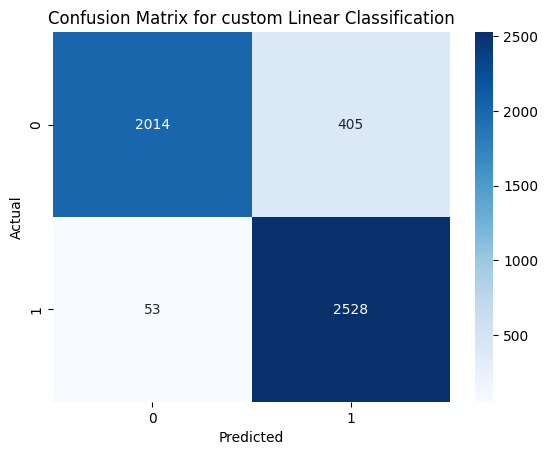

pressisiom:  0.8619161268325947
recall:  0.9794653235180163
f1:  0.9169387014871236
accuracy:  0.9084


In [61]:
cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for custom Linear Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#Логистическая регрессия

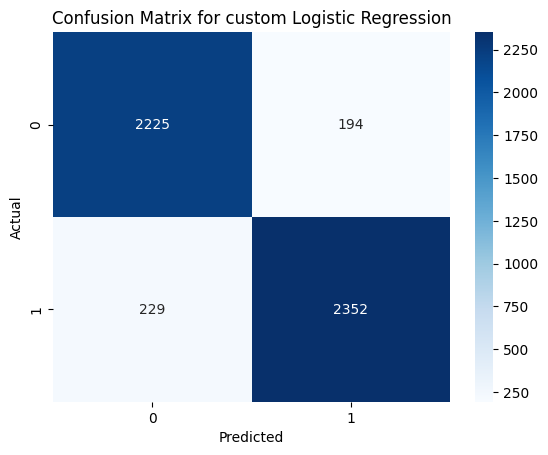

pressisiom:  0.9238020424194815
recall:  0.9112746997287873
f1:  0.9174956114686952
accuracy:  0.9154


In [65]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            linear_model = linear_model.astype(float)
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights = self.weights - self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        linear_model = linear_model.astype(float)
        y_predicted = self._sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


model = CustomLogisticRegression()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)

cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for custom Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#Логистическая регрессия(sklearn)


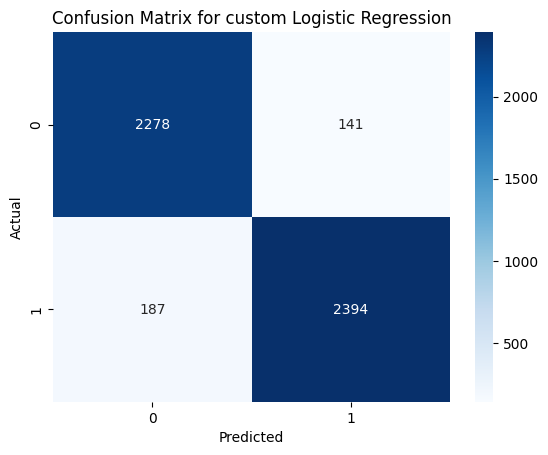

pressisiom:  0.9443786982248521
recall:  0.9275474622239442
f1:  0.9358874120406567
accuracy:  0.9344


In [66]:
model = LogisticRegression()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)

cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#SVM

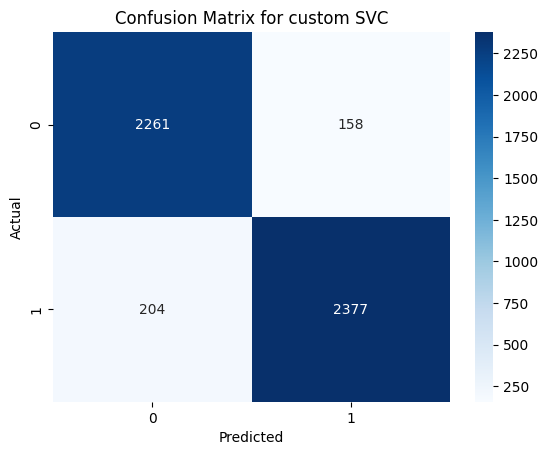

pressisiom:  0.9376725838264299
recall:  0.9209608678806664
f1:  0.9292415949960907
accuracy:  0.9276


In [69]:
model = SVC()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)

cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#Рещающее дерево

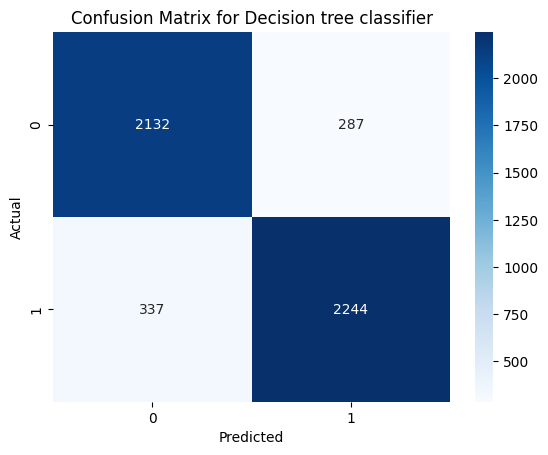

pressisiom:  0.8866060845515606
recall:  0.8694304533126695
f1:  0.8779342723004695
accuracy:  0.8752


In [70]:
model = DecisionTreeClassifier()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)

cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#Случайный лес

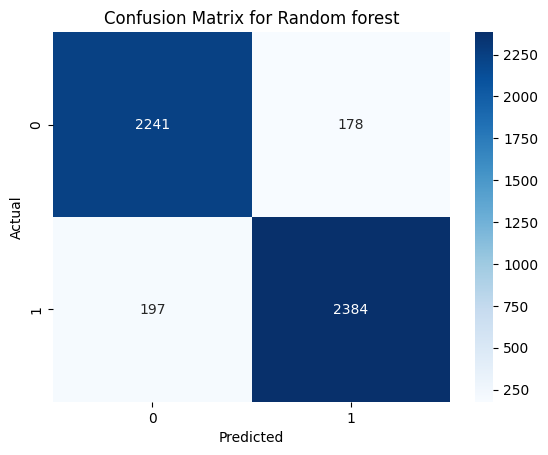

pressisiom:  0.9305230288836847
recall:  0.9236729949631926
f1:  0.927085358740035
accuracy:  0.925


In [71]:
model = RandomForestClassifier()
model.fit(data, approved)
approved_predict = model.predict(test)

precision = precision_score(test_approved, approved_predict)
recall = recall_score(test_approved, approved_predict)
f1 = f1_score(test_approved, approved_predict)
accuracy = accuracy_score(test_approved, approved_predict)

cm = confusion_matrix(test_approved, approved_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('pressision: ', precision)
print('recall: ', recall)
print('f1: ', f1)
print('accuracy: ', accuracy)

#Градиентный бустинг

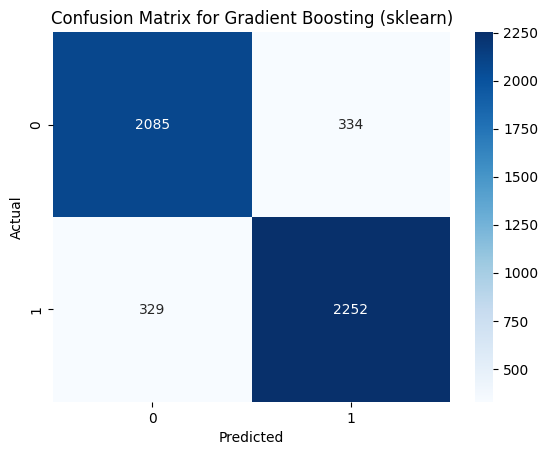

pressisiom:  0.8708430007733952
recall:  0.8725300271212708
f1:  0.8716856976969228
accuracy:  0.8674


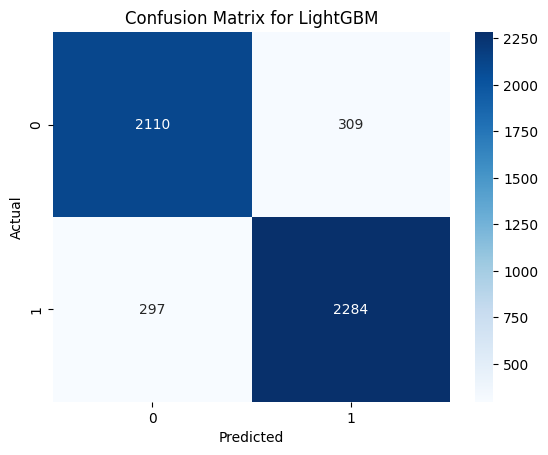

pressisiom:  0.8808330119552642
recall:  0.8849283223556761
f1:  0.8828759180517974
accuracy:  0.8788


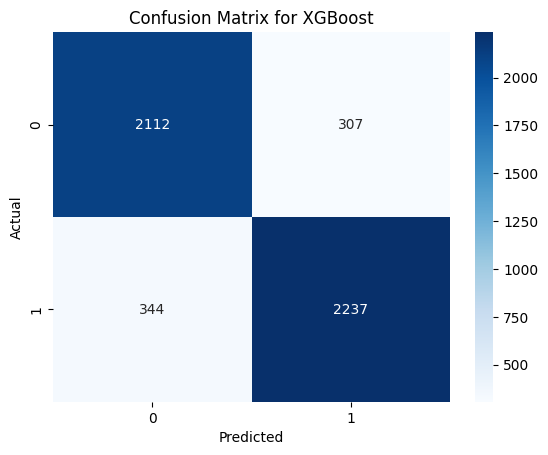

pressisiom:  0.8793238993710691
recall:  0.8667183262301433
f1:  0.8729756097560976
accuracy:  0.8698


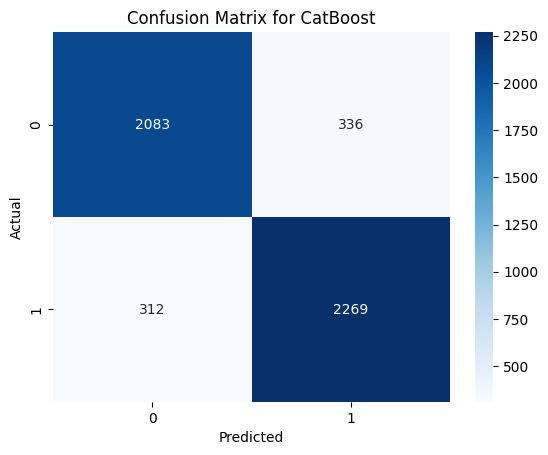

pressisiom:  0.8710172744721689
recall:  0.8791166214645486
f1:  0.8750482067103741
accuracy:  0.8704


In [72]:
models = {
    "Gradient Boosting (sklearn)": GradientBoostingClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

for name, model in models.items():

    model = DecisionTreeClassifier()
    model.fit(data, approved)
    approved_predict = model.predict(test)

    precision = precision_score(test_approved, approved_predict)
    recall = recall_score(test_approved, approved_predict)
    f1 = f1_score(test_approved, approved_predict)
    accuracy = accuracy_score(test_approved, approved_predict)

    cm = confusion_matrix(test_approved, approved_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('pressision: ', precision)
    print('recall: ', recall)
    print('f1: ', f1)
    print('accuracy: ', accuracy)

#Вывод


В процессе выполнения работы я изучил различные методы классификации и реализовал двв из них. Использованные методы отличаличь в точности предсказаний. Самой информативной метрикой качества модели оказалась f1 метрика, так как она учитывает и pressision, и recall. Таким образом обе метрики должны показать хороший результат для высокой f1 оценки. Самой точной моделью по этой метрике оказалась Логистическая регрессия из библиотеки sklearn. Этот результат имеет смысл, учитывая дополнительную оптимизацию библиотечных моделей по сравнению с написанными мной. Тем не менее написанные мной модели справились лучше библиотечных моделей градиентного бустинга и дерева решений, но хуже SVM и случайного леса. Несмотря на свою простоту они показали очень хороший результат и в отличии от библиотечных моделей позволяют более точно настроить модель для конкретной задачи.

